In [7]:
import Ab as ab
import datetime as dt



# Get data from yahoo finance
sd = dt.datetime(2001,1,1)
ed = dt.datetime(2023,3,2)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ', sd, ed)
#nasdaq stocks above 200 day moving average percentage

qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD', sd, ed)

tqqq= ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ', sd, ed)

naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [27]:
import time
def sliding_test(ticker: ab.StockData, indicator:ab.StockData, stg:ab.Strategy, window: int, inc: int, sd: dt.datetime, ed: dt.datetime, run_strategy: bool = True, verbose: bool = False):
    delta = ed - sd
    result = []
    for i in range(0, delta.days + 1, inc):
        sd_5y = sd + dt.timedelta(days=i)
        ed_5y = sd + dt.timedelta(days=i) + dt.timedelta(days=window)
        t = time.time()
        if run_strategy:
            stg.run_strategy(indicator, sd_5y, ed_5y)
        
        b = time.time()
        bt = None
        bt = ab.BackTest()
        bt.run_backtest(stg, ticker,sd_5y, ed_5y)
        result.append([ed_5y,bt.balance.iloc[-1]['Total']])
        if(verbose):
            print(result[-1], "{:.2}s {:.2}s".format(b-t, time.time() - b))
        
        
        
    return result



In [25]:
test_sd = dt.datetime(2011,3,1)
test_ed = dt.datetime(2018,3,1)
window = 365*5
inc = 21
bts = []
ticker = tqqq
indicator = naa200r

In [28]:
buy_and_hold = ab.BuyAndHold()
bh_result = sliding_test(ticker, ticker, buy_and_hold, window, inc, test_sd, test_ed, True, True)
bts.append([bh_result, buy_and_hold.name])

ValueError: Unknown format code 's' for object of type 'float'

In [11]:
naa200r_40_stg = ab.Threshold('NAA200R', buy_threshold = 15, sell_threshold = 30, signal_ma_window = 40)
naa200r_40_stg_result = sliding_test(ticker, indicator, naa200r_40_stg, window, inc, test_sd,test_ed, True)
bts.append([naa200r_40_stg_result, naa200r_40_stg.name])



[datetime.datetime(2016, 2, 28, 0, 0), 3.130663187165125] --- 0.4529759883880615 seconds ---
[datetime.datetime(2016, 3, 20, 0, 0), 3.5288400538973295] --- 0.44094133377075195 seconds ---
[datetime.datetime(2016, 4, 10, 0, 0), 3.775305157983817] --- 0.4272947311401367 seconds ---
[datetime.datetime(2016, 5, 1, 0, 0), 3.0559988978804] --- 0.42394423484802246 seconds ---
[datetime.datetime(2016, 5, 22, 0, 0), 3.4826648506952584] --- 0.4259514808654785 seconds ---
[datetime.datetime(2016, 6, 12, 0, 0), 4.003318628510254] --- 0.44860291481018066 seconds ---
[datetime.datetime(2016, 7, 3, 0, 0), 3.3419561896900123] --- 0.4505946636199951 seconds ---
[datetime.datetime(2016, 7, 24, 0, 0), 2.840268559332433] --- 0.4348270893096924 seconds ---
[datetime.datetime(2016, 8, 14, 0, 0), 3.9670363128896513] --- 0.44321227073669434 seconds ---
[datetime.datetime(2016, 9, 4, 0, 0), 5.17053960812026] --- 0.4297664165496826 seconds ---
[datetime.datetime(2016, 9, 25, 0, 0), 5.134849663179769] --- 0.4159

In [12]:
naa200r_20_stg = ab.Threshold('NAA200R', buy_threshold = 15, sell_threshold = 30)
naa200r_20_stg_result = sliding_test(ticker, indicator, naa200r_20_stg,window, inc, test_sd,test_ed, True)
bts.append([naa200r_20_stg_result, naa200r_20_stg.name])

[datetime.datetime(2016, 2, 28, 0, 0), 3.592576341551472] --- 0.45922422409057617 seconds ---
[datetime.datetime(2016, 3, 20, 0, 0), 4.049502144697529] --- 0.44823288917541504 seconds ---
[datetime.datetime(2016, 4, 10, 0, 0), 3.922050839729715] --- 0.45453929901123047 seconds ---
[datetime.datetime(2016, 5, 1, 0, 0), 3.506895722715578] --- 0.460435152053833 seconds ---
[datetime.datetime(2016, 5, 22, 0, 0), 3.9965140291857115] --- 0.461392879486084 seconds ---
[datetime.datetime(2016, 6, 12, 0, 0), 4.406096283980746] --- 0.484149694442749 seconds ---
[datetime.datetime(2016, 7, 3, 0, 0), 3.8350445333129946] --- 0.4826781749725342 seconds ---
[datetime.datetime(2016, 7, 24, 0, 0), 4.160919243038824] --- 0.46839070320129395 seconds ---
[datetime.datetime(2016, 8, 14, 0, 0), 5.155983536850587] --- 0.500847578048706 seconds ---
[datetime.datetime(2016, 9, 4, 0, 0), 5.950936372534114] --- 0.45564794540405273 seconds ---
[datetime.datetime(2016, 9, 25, 0, 0), 6.535517458918974] --- 0.464199

In [13]:
ma_threshold = ab.MAThreshold(ma_window = 200, buy_threshold = 1.00, sell_threshold = 1)
ma_threshold_result = sliding_test(ticker,indicator, ma_threshold,window, inc, test_sd,test_ed, True)
bts.append([ma_threshold_result, ma_threshold.name])


[datetime.datetime(2016, 2, 28, 0, 0), 2.0446059041329185] --- 0.5012154579162598 seconds ---
[datetime.datetime(2016, 3, 20, 0, 0), 2.2146332768415364] --- 0.5052120685577393 seconds ---
[datetime.datetime(2016, 4, 10, 0, 0), 2.08070096548784] --- 0.499237060546875 seconds ---
[datetime.datetime(2016, 5, 1, 0, 0), 1.684266460925058] --- 0.49884915351867676 seconds ---
[datetime.datetime(2016, 5, 22, 0, 0), 1.9194167925705055] --- 0.49516963958740234 seconds ---
[datetime.datetime(2016, 6, 12, 0, 0), 2.0000699564509175] --- 0.500873327255249 seconds ---
[datetime.datetime(2016, 7, 3, 0, 0), 1.8274738802004467] --- 0.5401129722595215 seconds ---
[datetime.datetime(2016, 7, 24, 0, 0), 2.1201991123415453] --- 0.5225346088409424 seconds ---
[datetime.datetime(2016, 8, 14, 0, 0), 2.32196268234984] --- 0.506399393081665 seconds ---
[datetime.datetime(2016, 9, 4, 0, 0), 2.3116683647499867] --- 0.5195498466491699 seconds ---
[datetime.datetime(2016, 9, 25, 0, 0), 2.389528713337243] --- 0.50064

In [14]:
ma_threshold2 = ab.MAThreshold(ma_window = 200, buy_threshold = 1.03, sell_threshold = 0.95)
ma_threshold_result2 = sliding_test(ticker, indicator, ma_threshold2,window, inc, test_sd,test_ed, True)
bts.append([ma_threshold_result2, ma_threshold2.name])


[datetime.datetime(2016, 2, 28, 0, 0), 2.140288156465462] --- 0.4554569721221924 seconds ---
[datetime.datetime(2016, 3, 20, 0, 0), 2.3182723691431226] --- 0.4382898807525635 seconds ---
[datetime.datetime(2016, 4, 10, 0, 0), 2.178814842191439] --- 0.44794297218322754 seconds ---
[datetime.datetime(2016, 5, 1, 0, 0), 1.7636867690924376] --- 0.43382835388183594 seconds ---
[datetime.datetime(2016, 5, 22, 0, 0), 1.951171481911826] --- 0.4342317581176758 seconds ---
[datetime.datetime(2016, 6, 12, 0, 0), 2.235339278300725] --- 0.4530763626098633 seconds ---
[datetime.datetime(2016, 7, 3, 0, 0), 2.170430730520727] --- 0.4341847896575928 seconds ---
[datetime.datetime(2016, 7, 24, 0, 0), 2.5180908784010168] --- 0.4539952278137207 seconds ---
[datetime.datetime(2016, 8, 14, 0, 0), 2.757718846488604] --- 0.47573184967041016 seconds ---
[datetime.datetime(2016, 9, 4, 0, 0), 2.7454926234434844] --- 0.5081651210784912 seconds ---
[datetime.datetime(2016, 9, 25, 0, 0), 2.837964803261617] --- 0.44

In [15]:
macross_strategy = ab.MACross(short_window=50, long_window=200)
ma_threshold_result2 = sliding_test(ticker, indicator, macross_strategy,window, inc, test_sd,test_ed, True)
bts.append([ma_threshold_result2, macross_strategy.name])

[datetime.datetime(2016, 2, 28, 0, 0), 2.230763434230835] --- 0.4155735969543457 seconds ---
[datetime.datetime(2016, 3, 20, 0, 0), 2.416271480104141] --- 0.42772531509399414 seconds ---
[datetime.datetime(2016, 4, 10, 0, 0), 2.2994952156654582] --- 0.40262413024902344 seconds ---
[datetime.datetime(2016, 5, 1, 0, 0), 1.9405447488566716] --- 0.40831923484802246 seconds ---
[datetime.datetime(2016, 5, 22, 0, 0), 2.2114755973020253] --- 0.4176802635192871 seconds ---
[datetime.datetime(2016, 6, 12, 0, 0), 2.5420882670945586] --- 0.41294264793395996 seconds ---
[datetime.datetime(2016, 7, 3, 0, 0), 2.5937444583654483] --- 0.4239161014556885 seconds ---
[datetime.datetime(2016, 7, 24, 0, 0), 3.009211107118007] --- 0.4200468063354492 seconds ---
[datetime.datetime(2016, 8, 14, 0, 0), 3.2955753322261883] --- 0.41786980628967285 seconds ---
[datetime.datetime(2016, 9, 4, 0, 0), 3.28096454653094] --- 0.4140779972076416 seconds ---
[datetime.datetime(2016, 9, 25, 0, 0), 3.3914721985759844] --- 

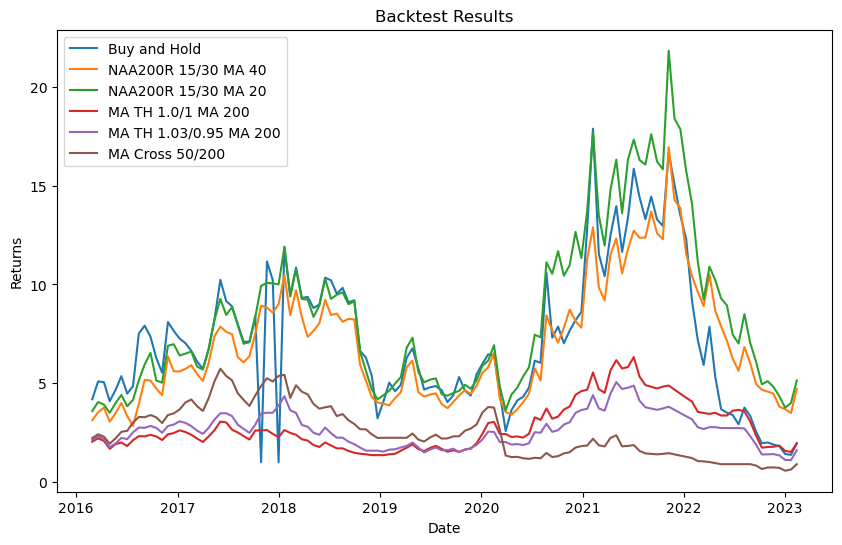

In [16]:
import matplotlib.pyplot as plt

def plot_bt(backtests):
    fig, ax = plt.subplots(figsize=(10, 6))

    for bt in backtests:
        dates = [x[0] for x in bt[0]]
        returns = [x[1] for x in bt[0]]
        label = bt[1]

        ax.plot(dates, returns, label=label)

    ax.legend(loc='upper left')
    ax.set_xlabel('Date')
    ax.set_ylabel('Returns')
    ax.set_title('Backtest Results')

    plt.show()
plot_bt(bts)

In [17]:
import numpy as np
#calculat the avg and std of the results
def calc_avg_std(bt):
    returns = [x[1] for x in bt]
    return np.mean(returns), np.std(returns)

for bt in bts:
    avg, std = calc_avg_std(bt[0])
    print(f'{bt[1]}: avg: {avg}, std: {std}')



Buy and Hold: avg: 7.217806456399391, std: 3.6292219225610016
NAA200R 15/30 MA 40: avg: 6.944025859912387, std: 2.9725140979373648
NAA200R 15/30 MA 20: avg: 8.389872538640159, std: 4.054624878044215
MA TH 1.0/1 MA 200: avg: 2.7674566589536096, std: 1.2128595100679704
MA TH 1.03/0.95 MA 200: avg: 2.64249317124311, std: 0.8723058302494827
MA Cross 50/200: avg: 2.5111276453593527, std: 1.323316785331854
